In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('bmh')
from numpy import *
from scipy.integrate import solve_ivp

In [2]:
# Parametros
H0 = 67.5      # Constante de Hubble [km/s/Mpc]
c = 299792.458 # Velocidad de la luz [km/s]
Om_r0 = 1e-4   # radiation density today (photons + neutrinos)
Om_m0 = 0.3    # matter density today 
Om_k0 = 0
Om_l0 = 1 - Om_r0 - Om_m0 - Om_k0

In [3]:
def H(a):
    E =  Om_r0 * a**(-4) + Om_m0 * a**(-3) + Om_k0 * a**(-2) # (H(a)/H0)^2
    return H0*sqrt(E)

In [4]:
# Solución Numerica
def Sol(k): 
    x = logspace(-4, 0, 1000) 
    y0 = [1e-5, 0.] #  θ(0), δ(0)
    
    def dy(x, y):
        a = x
        delta = y[0]
        theta = y[1]

    #EDOs
        # dθda
        dtheta = -theta + -3*H0**2 *Om_m0*delta/(2*a**2 *H(a))
        # dδda
        ddelta = -theta/(a*H(a)) 
        
        dydx = [ddelta, dtheta]
        
        return dydx
    
    x_span = [x[0], x[-1]]
    sol = solve_ivp(dy, x_span, y0, t_eval=x,
                    method='DOP853', rtol=1e-8, atol=1e-10)
    
    a  = sol.t
    delta= sol.y[0]
    theta = sol.y[1]
    
    return a, delta, theta

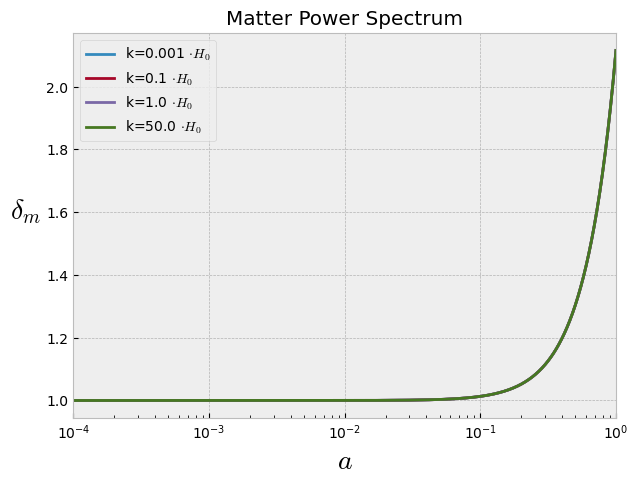

In [5]:
ks = [1e-3*H0, 0.1*H0, H0, 50*H0] # k/H0
δ0 = 1e-5 # Delta inicial

plt.figure(figsize=(7,5))
for k in ks:
    a, δ, θ = Sol(k= k)
    plt.semilogx(a, δ/δ0, label=f'k={k/H0} $\cdot H_{0}$')
plt.xlim(a[0], a[-1])  

plt.title('Matter Power Spectrum')
plt.xlabel(r'$a$', size = 20)
plt.ylabel(r'$\delta_{m}$',rotation=0, ha='right', size = 20)
plt.legend()
plt.grid(True)
plt.show()